<a href="https://colab.research.google.com/github/boram-coco/coco1/blob/master/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (09.19)

- 제출은 `이름(학번).ipynb` 파일과 `이름(학번).html`파일 2개를 제출할 것. 
- ipynb 혹은 html 파일을 이용한 제출이 익숙하지 않은 학생은 질문할 것. 

In [ ]:
from fastai.vision.all import * 
from fastai.collab import * 
from fastai.text.all import *

## `1`. 이미지자료분석 

아래를 이용하여 MNIST_SAMPLE 이미지 자료를 다운로드 받고 dls오브젝트를 만들어라. 

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
path

Path('/root/.fastai/data/mnist_sample')

In [ ]:
PILImage.create('/root/.fastai/data/mnist_sample/train/7/1001.png')

In [ ]:
PILImage.create('/root/.fastai/data/mnist_sample/train/7/10014.png')

In [ ]:
PILImage.create('/root/.fastai/data/mnist_sample/train/3/1007.png')

In [ ]:
files= get_image_files(path)
files

(#14434) [Path('/root/.fastai/data/mnist_sample/train/3/21099.png'),Path('/root/.fastai/data/mnist_sample/train/3/47441.png'),Path('/root/.fastai/data/mnist_sample/train/3/20051.png'),Path('/root/.fastai/data/mnist_sample/train/3/15511.png'),Path('/root/.fastai/data/mnist_sample/train/3/21986.png'),Path('/root/.fastai/data/mnist_sample/train/3/1870.png'),Path('/root/.fastai/data/mnist_sample/train/3/11714.png'),Path('/root/.fastai/data/mnist_sample/train/3/47395.png'),Path('/root/.fastai/data/mnist_sample/train/3/33432.png'),Path('/root/.fastai/data/mnist_sample/train/3/45903.png')...]

In [ ]:
files[0]

Path('/root/.fastai/data/mnist_sample/train/3/21099.png')

In [ ]:
PILImage.create(files[0])
print(files[0])

/root/.fastai/data/mnist_sample/train/3/21099.png


In [ ]:
print(files[14431])
PILImage.create(files[14431])

/root/.fastai/data/mnist_sample/valid/7/1494.png


In [ ]:
dls = ImageDataLoaders.from_folder(path,suffle=False)


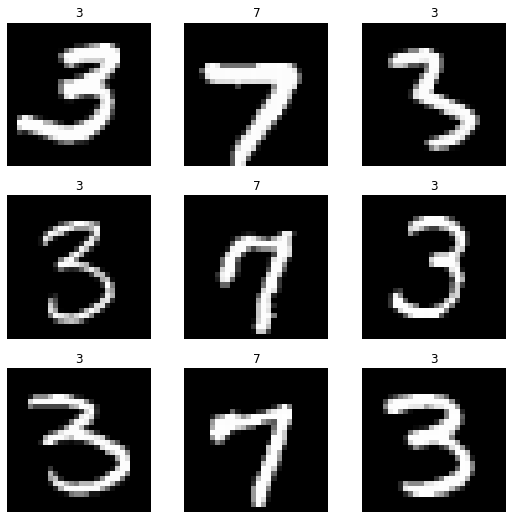

In [ ]:
dls.show_batch(max_n=9)

`(1)` cnn_learner를 이용하여 lrnr 오브젝트를 생성하라. 
- arch 는 resnet34 로 설정할 것 
- metrics 는 error_rate 로 설정할 것 

In [ ]:
lrnr = cnn_learner(dls, arch=resnet34, metrics=error_rate) 


`(2)` fine_tune 을 이용하여 lrnr 오브젝트를 학습하라. 

In [ ]:
lrnr.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.257284,0.184122,0.061825,02:28


epoch,train_loss,valid_loss,error_rate,time
0,0.050129,0.015302,0.004416,05:29


`(3)` 아래를 이용하여 X,y를 만들어라. 

```python
X,y = dls.one_batch()
```

X,y의 shape을 조사하라. X에는 몇개의 이미지가 있는가? 이미지의 size는 얼마인가? 

64개의 이미지, 이미지 size: 28x28

In [ ]:
X,y = dls.one_batch()

In [ ]:
X.shape

torch.Size([64, 3, 28, 28])

In [ ]:
y.shape

torch.Size([64])

`(4)` 아래의 코드를 이용하여 X의 두번째 이미지가 어떠한 숫자를 의미하는지 확인하라. (그림보고 3인지 7인지 확인하여 답을 쓸 것)
```python
show_image(X[0])
```

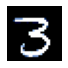

In [ ]:
show_image(X[1])

X의 두번째 이미지는 3이다.

그리고 show_image가 정의된 파일의 경로를 확인하고 show_image가 python 내장함수 인지, torch에서 지원하는 함수인지 fastai에서 지원하는 함수인지 파악하라. 

In [ ]:
show_image?

show_image 파일 경로: /usr/local/lib/python3.7/dist-packages/fastai/torch_core.py

fastai 지원 함수

`(5)` lrnr 오브젝트를 이용하여 AI가 X[0]을 어떤 값으로 판단하는지 확인하라. 올바르게 판단하였는가? 올바르게 판단했다면 몇 프로의 확신으로 판단하였는가?

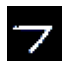

In [ ]:
show_image(X[0])

In [ ]:
lrnr.model(X[0].reshape(1,3,28,28))

TensorBase([[-12.3622,   9.8272]], grad_fn=<AliasBackward0>)

In [ ]:
import numpy as np
a=np.exp(-12.3622)
b=np.exp(9.8272)
print('3일확률',a/(a+b))
print('7일확률',b/(a+b))

3일확률 2.3081605986824723e-10
7일확률 0.999999999769184


99%의 확률로 7로 판단하였다.

## `2`. 추천시스템

아래를 이용하여 rcmd_anal.csv 를 다운로드 받고 dls오브젝트를 만들어라.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv')

In [ ]:
df

,user,item,rating,item_name
0,1,15,1.084308,홍차5
1,1,1,4.149209,커피1
2,1,11,1.142659,홍차1
3,1,5,4.033415,커피5
4,1,4,4.078139,커피4
...,...,...,...,...
995,100,18,4.104276,홍차8
996,100,17,4.164773,홍차7
997,100,14,4.026915,홍차4
998,100,4,0.838720,커피4


In [ ]:
df.user.unique(), df.item.unique()

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([15,  1, 11,  5,  4, 14,  6, 20, 12, 17,  8,  9, 13, 19, 18, 16,  2,
         3, 10,  7]))

`(1)` 73번 유저가 먹은 아이템 및 평점을 출력하는 코드를 작성하라. 이를 기반으로 73번 유저가 어떠한 취향인지 파악하라. 

73번 유저는 커피에 대한 평점이 1점 내외이고 홍차에 대한 평점이 3.8 내외이므로 홍차를 선호한다.

In [ ]:
df.query('user==73')

,user,item,rating,item_name
720,73,20,3.733853,홍차10
721,73,18,3.975004,홍차8
722,73,9,1.119541,커피9
723,73,13,3.840801,홍차3
724,73,2,0.943742,커피2
725,73,4,1.152405,커피4
726,73,1,0.887292,커피1
727,73,7,0.947641,커피7
728,73,6,0.868370,커피6
729,73,17,3.873590,홍차7


`(2)` dls와 lrnr 오브젝트를 생성하고 lrnr 오브젝트를 학습하라. 

In [ ]:
dls=CollabDataLoaders.from_df(df)

In [ ]:
dls.show_batch()

,user,item,rating
0,9,15,1.004437
1,13,14,1.081567
2,82,6,1.098699
3,90,8,1.287647
4,44,5,3.725722
5,27,8,4.013633
6,82,14,4.170309
7,17,12,1.023879
8,87,9,1.140399
9,91,7,1.239160


In [ ]:
lrnr=collab_learner(dls, y_range=(0,5))

In [ ]:
lrnr.fit(50)

epoch,train_loss,valid_loss,time
0,0.862514,0.869427,00:00
1,0.737487,0.652867,00:00
2,0.621718,0.475060,00:00
3,0.515461,0.338439,00:00
4,0.423037,0.239370,00:00
5,0.344293,0.170862,00:00
6,0.278972,0.125716,00:00
7,0.227024,0.096374,00:00
8,0.185344,0.078020,00:00
9,0.152430,0.066777,00:00


`(3)` 아래와 같은 데이터 프레임을 생성하고 df_new 에 저장하라. 

In [ ]:
#collapse
import IPython 
_html='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>user</th>\n      <th>item</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>73</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>73</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>73</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>73</td>\n      <td>4</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>73</td>\n      <td>5</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>73</td>\n      <td>6</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>73</td>\n      <td>7</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>73</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>73</td>\n      <td>9</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>73</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>10</th>\n      <td>73</td>\n      <td>11</td>\n    </tr>\n    <tr>\n      <th>11</th>\n      <td>73</td>\n      <td>12</td>\n    </tr>\n    <tr>\n      <th>12</th>\n      <td>73</td>\n      <td>13</td>\n    </tr>\n    <tr>\n      <th>13</th>\n      <td>73</td>\n      <td>14</td>\n    </tr>\n    <tr>\n      <th>14</th>\n      <td>73</td>\n      <td>15</td>\n    </tr>\n    <tr>\n      <th>15</th>\n      <td>73</td>\n      <td>16</td>\n    </tr>\n    <tr>\n      <th>16</th>\n      <td>73</td>\n      <td>17</td>\n    </tr>\n    <tr>\n      <th>17</th>\n      <td>73</td>\n      <td>18</td>\n    </tr>\n    <tr>\n      <th>18</th>\n      <td>73</td>\n      <td>19</td>\n    </tr>\n    <tr>\n      <th>19</th>\n      <td>73</td>\n      <td>20</td>\n    </tr>\n  </tbody>\n</table>'
IPython.display.HTML(_html)

,user,item
0,73,1
1,73,2
2,73,3
3,73,4
4,73,5
5,73,6
6,73,7
7,73,8
8,73,9
9,73,10


In [ ]:
df_new=pd.DataFrame({'user':[73]*20,'item':range(1,21)})
df_new

,user,item
0,73,1
1,73,2
2,73,3
3,73,4
4,73,5
5,73,6
6,73,7
7,73,8
8,73,9
9,73,10


`(4)` 아래의 코드를 이용하여 73번 유저의 취향을 파악하라. 73번 유저가 커피3, 커피5를 먹는다면 얼마정도의 평점을 줄 것이라 예측되는가? 

```Python
_dl = dls.test_dl(df_new)
lrnr.get_preds(dl=_dl)
```


In [ ]:
dls.test_dl(df_new)

In [ ]:
_dl = dls.test_dl(df_new)

In [ ]:
lrnr.get_preds(dl=_dl)

(tensor([1.0893, 1.0247, 1.0586, 1.0714, 1.0053, 0.9972, 1.1182, 1.0397, 1.0489,
         1.0752, 3.8042, 3.9009, 3.8459, 3.8934, 3.8987, 3.8195, 3.8605, 3.8765,
         3.8246, 3.8984]), None)

커피3: 1.0586, 커피5: 1.0053

## `3`. 시퀀스자료분석

아래를 이용하여 자료를 다운로드 받아라. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-19-human_numbers_100.csv')

In [ ]:
df

,Unnamed: 0,text
0,0,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1,1,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
2,2,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
3,3,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
4,4,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
...,...,...
1995,1995,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1996,1996,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thi

`(1)` TextDataLoaders.from_df을 이용하여 dls오브젝트를 만들어라. 
- is_lm = True 로 설정할 것 
- seq_len = 5 로 설정할 것 

In [ ]:
TextDataLoaders.from_df?

In [ ]:
dls = TextDataLoaders.from_df(df,is_lm=True, seq_len=5,text_col='text')

In [ ]:
dls.show_batch()

,text,text_
0,"xxbos one , two ,","one , two , three"
1,"hundred xxbos one , two","xxbos one , two ,"
2,"one hundred xxbos one ,","hundred xxbos one , two"
3,", one hundred xxbos one","one hundred xxbos one ,"
4,"nine , one hundred xxbos",", one hundred xxbos one"
5,"ninety nine , one hundred","nine , one hundred xxbos"
6,", ninety nine , one","ninety nine , one hundred"
7,"eight , ninety nine ,",", ninety nine , one"
8,"ninety eight , ninety nine","eight , ninety nine ,"


`(2)` lrnr 오브젝트를 만들어라. 
- arch = AWD_LSTM 이용 
- metrics = accuracy 이용 

In [ ]:
language_model_learner?

In [ ]:
lrnr = language_model_learner(dls, arch=AWD_LSTM, metrics=accuracy)

`(3)` lrnr오브젝트에서 fine_tune(3) 메소드를 이용하여 모형을 학습하라. 

In [ ]:
lrnr.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.526523,0.167046,0.974004,16:31


epoch,train_loss,valid_loss,accuracy,time
0,0.017960,0.003992,0.999178,26:45
1,0.001488,0.002458,0.999269,26:43
2,0.000649,0.002247,0.999306,26:43


`(4)` 'one , two ,' 이후에 이어질 50개의 단어를 생성하라.

In [ ]:
lrnr.predict('one, two', n_words=50)

'one , two , three , four , five , six , seven , eight , nine , ten , eleven , twelve , thirteen , fourteen , fifteen , sixteen , seventeen , eighteen , nineteen , twenty , twenty one , twenty two , twenty three , twenty four , twenty'

`(5)` 'twenty , twenty one , ' 이후에 이어질 50개의 단어를 생성하라. 

In [ ]:
lrnr.predict('twenty, twenty one', n_words=50)

'twenty , twenty one , twenty two , twenty three , twenty four , twenty five , twenty six , twenty seven , twenty eight , twenty nine , thirty , thirty one , thirty two , thirty three , thirty four , thirty five , thirty six , thirty seven , thirty eight'

## `4`. 리눅스명령어

Collab 에서 (혹은 리눅스기반 서버에서) 아래의 명령어를 순서대로 실행해보라. 
```
!ls
!ls -a 
!ls .
!ls .. 
!ls sample
!mkdir asdf 
!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv
!cp 2022-09-08-rcmd_anal.csv ./asdf 
!ls ./asdf 
!rm 2022-09-08-rcmd_anal.csv 
!rm -rf asdf 
```

각 명령들이 무엇을 의미하는지 간단히 서술하라. 

In [ ]:
!ls

sample_data


!ls : 지정 위치 파일을 알 수 있다. 해당 폴더에 어떤 디렉토리나 파일이 있는지 확인한다.

In [ ]:
!ls -a 

.  ..  .config	sample_data


!ls -a : 디렉토리 안에 있는 모든 파일과 디렉토리를 다 보여준다.

In [ ]:
!ls .

sample_data


!ls . : !ls와 같이 지정 위치 파일을 알 수 있다. 나오는 결과값이 !ls와 같다.

In [ ]:
!ls .. 

bin	 dev   lib32  NGC-DL-CONTAINER-LICENSE	root  sys    var
boot	 etc   lib64  opt			run   tmp
content  home  media  proc			sbin  tools
datalab  lib   mnt    python-apt		srv   usr


!ls.. : sample_data 의 상위 폴더의 항목을 알려준다.

In [ ]:
!ls sample

ls: cannot access 'sample': No such file or directory


!ls sample : 

In [ ]:
!mkdir asdf 

!mkdir asdf : asdf 디렉토리를 생성

In [ ]:
!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv

--2022-09-29 04:04:43--  https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31987 (31K) [text/plain]
Saving to: ‘2022-09-08-rcmd_anal.csv’

2022-09-08-rcmd_ana 100%[===================>]  31.24K  --.-KB/s    in 0.002s  

2022-09-29 04:04:43 (12.8 MB/s) - ‘2022-09-08-rcmd_anal.csv’ saved [31987/31987]



!wget : 구글 드라이브로 파일 받아오는 방법. 링크만 작성하면 원본 그대로 다운이 되며 옵션을 통해 파일명을 지정할 수 있다.

In [ ]:
!cp 2022-09-08-rcmd_anal.csv ./asdf 

!cp : 파일을 복사한다. 2022-09-08-rcmd_anal.csv 파일을 복사하여 /asdf폴더에 넣는다.

In [ ]:
!ls ./asdf 

!ls ./asdf : 디렉토리에 asdf의 내용을 보여준다. 

In [ ]:
!rm 2022-09-08-rcmd_anal.csv

!rm : 파일을 삭제한다.

In [ ]:
!rm -rf asdf 

!rm-rf : 디렉토리(asdf)를 삭제한다.

In [ ]:
%%shell
jupyter nbconvert --to html ///content/KBR.ipynb

[NbConvertApp] Converting notebook ///content/KBR.ipynb to html
[NbConvertApp] Writing 400089 bytes to ///content/KBR.html
